In [1]:
## first step is to import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [10]:
df.shape

(20800, 5)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(18285, 5)

In [ ]:
##splitting x and y for model training

In [14]:
x=df.drop('label',axis=1)
y=df.label

In [16]:
x.shape,y.shape

((18285, 4), (18285,))

In [17]:
##since the data is in textual format so we need to do two things- 1) data cleaning using nltk
## 2)one hot reprsentation - for this we are fixing a voc size of 10000words

In [18]:
voc_size=10000

In [19]:
data=x.copy()
data.reset_index(inplace=True)
## resetting index is important as we have removed null data so continuity of indices is hampered

In [22]:
data.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [23]:
##importing libraries for data cleaning
import nltk
import re

In [24]:
##stopwords are the single/double/tripple letter words in english which do not have a literal meaning so we cab remove them
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Riddhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
#     print(i) ##printing the index of sentence in messeges

    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    ##here we will substitute or replace any character other than a-z or A-Z present on the sentence with a space
    
    review = review.lower()
    ## 'Thanks' and 'thanks' will be trated differently so we convert all words into lowercase
    
    review = review.split()
    ##splitting the sentence into words and storing each word in a list named review(This can also be done with the help of tokenization)
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    ##for every word in review list if that word is not present in stopwords then we will store that word in review
    
    review = ' '.join(review)
    corpus.append(review)

In [29]:
##here we have used following steps in data cleaning-
# 1) substituting anything apart from english letter with a space
# 2) converting everything to lower case
# 3) splitting the sentence into words- either by tokenization or by splitting
# 4) porter stemming and stopwords removal
# 5) joining cleaned sentences together

In [42]:
corpus
##corpus is the final data obtained after data cleaning

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [43]:
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[3066, 6788, 9220, 3133, 6373, 1402, 5054, 6077, 6441, 203],
 [7471, 7933, 7924, 8031, 5469, 7843, 6945],
 [5824, 1069, 696, 4135],
 [5481, 6870, 9035, 7912, 1626, 8474],
 [6077, 5469, 822, 4804, 7256, 227, 5469, 3551, 5789, 502],
 [8858,
  5578,
  4499,
  7073,
  1483,
  5033,
  9501,
  5777,
  8093,
  272,
  6616,
  3880,
  8783,
  6493,
  6945],
 [8851, 5089, 1337, 4153, 6605, 6408, 6957, 4865, 7166, 463, 5347],
 [4347, 2531, 1636, 8768, 9275, 5624, 5033, 2354, 7166, 463, 5347],
 [2058, 366, 6798, 8580, 3355, 9335, 7633, 8702, 5033, 3591],
 [869, 2454, 594, 8884, 9435, 3431, 9762, 5870],
 [4754, 25, 6689, 5348, 7823, 1716, 1528, 9994, 845, 3163, 6434],
 [7912, 8098, 6373, 9335, 5033, 9275],
 [8528, 7791, 7568, 6318, 6112, 9877, 3460, 9523, 8110],
 [8441, 7196, 1186, 4305, 4377, 1986, 9404, 7166, 463, 5347],
 [3984, 3987, 2747, 2152, 6368, 7166, 463, 5347],
 [283, 2420, 3508, 2822, 4230, 6061, 6490, 5302, 7042, 1985],
 [1619, 4847, 7933],
 [6823, 1339, 5131, 6343, 5033, 127, 6080, 6

In [44]:
##After doing one hot representation each word of each sentence has got a numerical represenation but since sentences are of different length so we also do embedding representation
## for this we are using pad sequences

In [45]:
sentence_length=20
emb_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sentence_length)
emb_docs

array([[   0,    0,    0, ..., 6077, 6441,  203],
       [   0,    0,    0, ..., 5469, 7843, 6945],
       [   0,    0,    0, ..., 1069,  696, 4135],
       ...,
       [   0,    0,    0, ..., 7166,  463, 5347],
       [   0,    0,    0, ..., 4364, 1496, 8777],
       [   0,    0,    0, ..., 6470, 3056, 2175]])

In [46]:
##building deep learning model

In [47]:
features=40
model=Sequential()
model.add(Embedding(voc_size,features,input_length=sentence_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile('adam','binary_crossentropy','accuracy')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________


In [66]:
emb_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3066,
       6788, 9220, 3133, 6373, 1402, 5054, 6077, 6441,  203])

In [49]:
x_final=np.array(emb_docs)
y_final=np.array(y)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.33,random_state=42)

In [51]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=64)

Epoch 1/10
192/192 [==============================] - 17s 60ms/step - loss: 0.3305 - accuracy: 0.8398 - val_loss: 0.2063 - val_accuracy: 0.9117
Epoch 2/10
192/192 [==============================] - 10s 54ms/step - loss: 0.1250 - accuracy: 0.9513 - val_loss: 0.1904 - val_accuracy: 0.9218
Epoch 3/10
192/192 [==============================] - 10s 54ms/step - loss: 0.0768 - accuracy: 0.9723 - val_loss: 0.2210 - val_accuracy: 0.9160
Epoch 4/10
192/192 [==============================] - 10s 53ms/step - loss: 0.0452 - accuracy: 0.9848 - val_loss: 0.2689 - val_accuracy: 0.9167
Epoch 5/10
192/192 [==============================] - 10s 51ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.3153 - val_accuracy: 0.9186
Epoch 6/10
192/192 [==============================] - 9s 47ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.4158 - val_accuracy: 0.9170
Epoch 7/10
192/192 [==============================] - 9s 49ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.5335 - val_accuracy: 0

In [53]:
y_pred=model.predict(x_test)
y_pred[:5]
##since output is shown in decimal places so we conver them so that we get either 1 or 0 as output

189/189 [==============================] - 3s 10ms/step


array([[0.9980614 ],
       [0.00162382],
       [0.00100918],
       [0.05083472],
       [0.9856812 ]], dtype=float32)

In [54]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

189/189 [==============================] - 2s 10ms/step


In [55]:
y_pred[:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [56]:
y_test[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [59]:
model.evaluate(x_test,y_test)

189/189 [==============================] - 2s 11ms/step - loss: 0.3342 - accuracy: 0.9100


[0.3342415690422058, 0.910024881362915]

In [ ]:
##trying out to create a model with dropout layers with dropout ratio of 0.3

In [52]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sentence_length))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model2.evaluate(x_test,y_test)

189/189 [==============================] - 4s 12ms/step - loss: 0.6933 - accuracy: 0.5143


[0.6932905912399292, 0.5143330693244934]

In [61]:
##clearly dropout layers are hampering model accuracy on test data o we avoid using it and go on with our first model

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score

<AxesSubplot:>

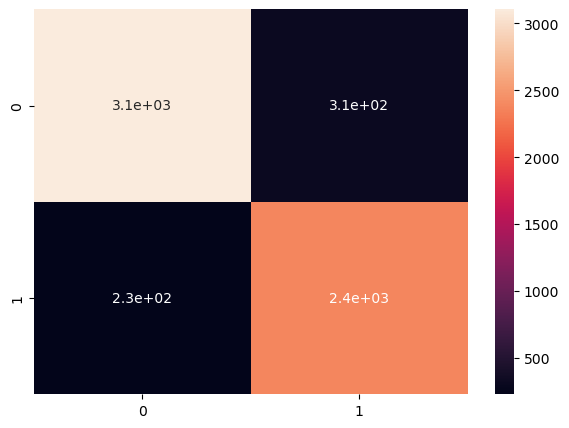

In [64]:
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)

In [65]:
accuracy_score(y_test,y_pred)

0.9100248550124275